# Exploratory Data Analysis with seaborn and pandas

In [20]:
# import statement for the seaborn library
import seaborn as sns

# import pandas statement 
import pandas as pd

# import matplotlib 

import matplotlib.pyplot as plt

In [4]:
# reading in the housing dataset from the web

housing = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Become-a-python-data-analyst/master/data/house_train.csv")

In [5]:
housing.shape

(1460, 81)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# creating a subset of the data with only the variables we need

num_vars = ["SalePrice","LotArea","OverallQual","OverallCond","YearBuilt","1stFlrSF","2ndFlrSF","BedroomAbvGr"]
cat_vars = ["MSZoning","LotShape","Neighborhood","CentralAir","SaleCondition","MoSold","YrSold"]

housing = housing[num_vars+cat_vars]

In [9]:
housing.shape

(1460, 15)

In [10]:
#descriptive statistics summary
housing["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

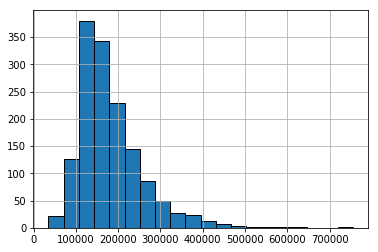

In [11]:
# histogram of the sales prices

housing["SalePrice"].hist(edgecolor ="black",bins=20)

In [12]:
#skewness and kurtosis

print("Skewness: {:0.3f}".format(housing["SalePrice"].skew()))
print("Kurtosis: {:0.3f}".format(housing["SalePrice"].kurt()))

Skewness: 1.883
Kurtosis: 6.536


In [13]:
# Examining all the numerical variables

housing[num_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


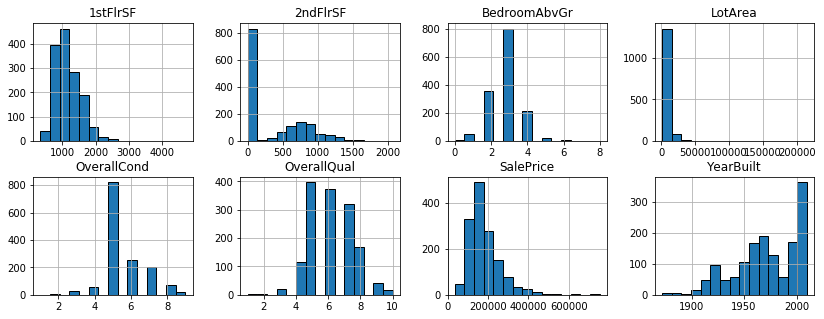

In [15]:
housing[num_vars].hist(edgecolor= "black",bins = 15,figsize=(14,5),layout = (2,4));

In [16]:
housing["Age"] = housing["YrSold"] - housing["YearBuilt"]
num_vars.remove("YearBuilt")
num_vars.append("Age")

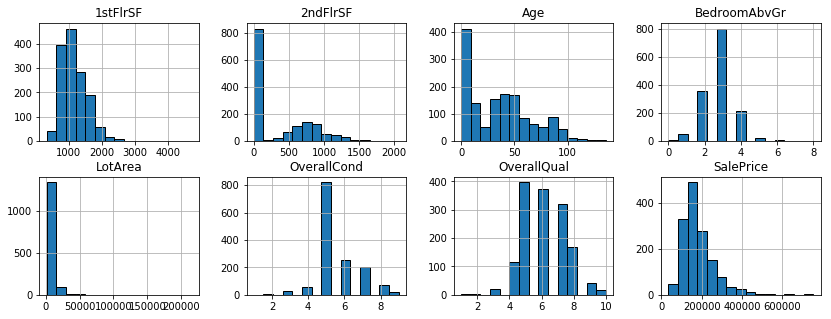

In [17]:
housing[num_vars].hist(edgecolor= "black",bins = 15,figsize=(14,5),layout = (2,4));

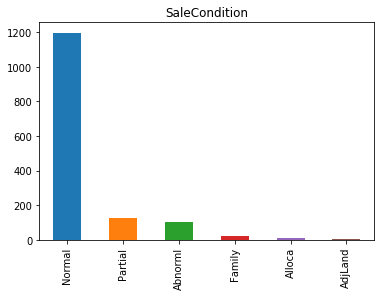

In [18]:
# anaylsis of the Categorical variables 

# bar plots are the best for categorical variables

housing["SaleCondition"].value_counts().plot(kind = "bar",title="SaleCondition");

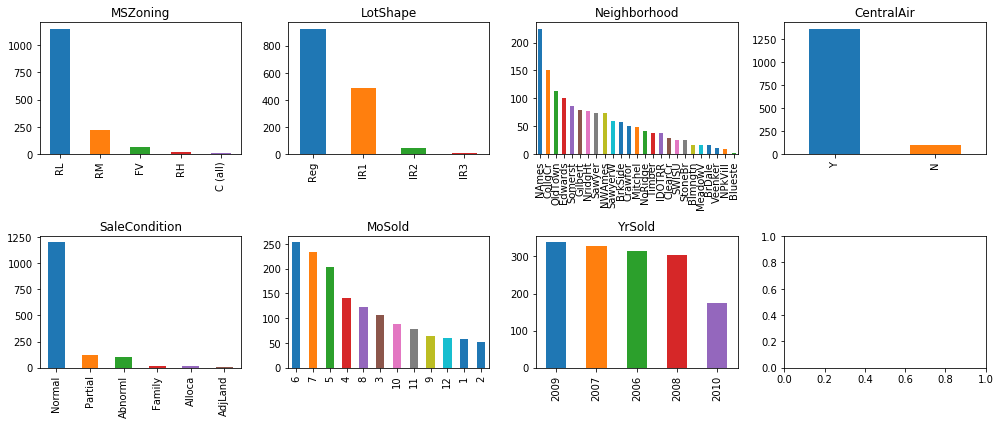

In [21]:
#ploting all the categorical variables

fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(cat_vars,ax.flatten()):
    housing[var].value_counts().plot(kind = "bar",ax = subplot,title=var)

fig.tight_layout()

In [25]:
# process of removing the levels that are less than 30

def id_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts >= 30].index)

In [26]:
levels_to_keep = housing[cat_vars].apply(id_cat_above30,axis=0)
levels_to_keep

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [27]:
for var in cat_vars:
    housing = housing.loc[housing[var].isin(levels_to_keep[var])]

In [28]:
housing.shape

(1246, 16)

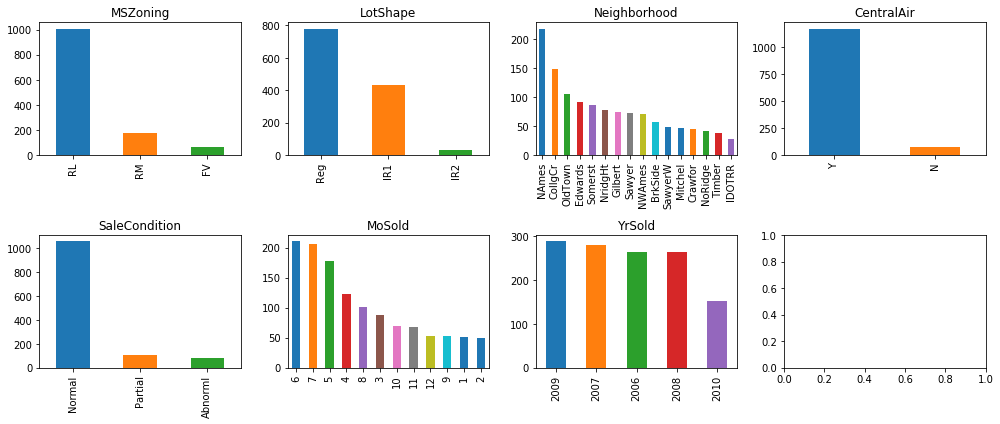

In [29]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(cat_vars,ax.flatten()):
    housing[var].value_counts().plot(kind = "bar",ax = subplot,title=var)

fig.tight_layout()

# Relationships between variables 

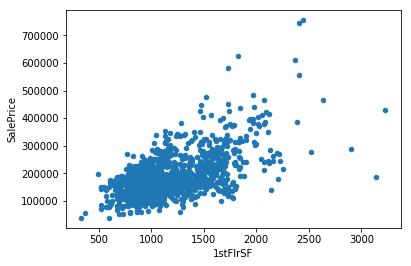

In [30]:
# scatter plot used for visualizing relationships between two numerical variables

housing.plot.scatter(x="1stFlrSF",y="SalePrice");

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


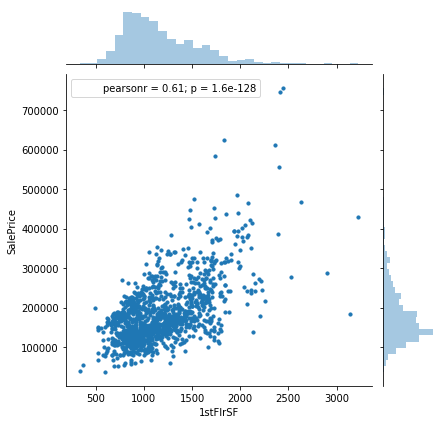

In [32]:
#using seaborn you can obtain a plot called the "jointplot" which will give you a scatter plot as well as a marginal plot

sns.jointplot(x="1stFlrSF",y="SalePrice",data=housing,joint_kws={"s":10});

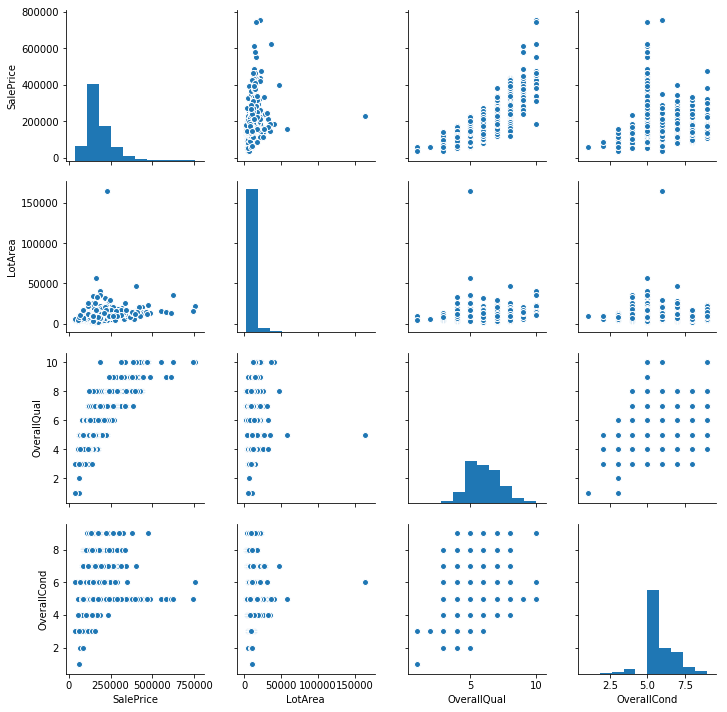

In [34]:
# two get the scatter plots of all numerical vriables in the example I'm only getting the first 4 

sns.pairplot(housing[num_vars[:4]]);

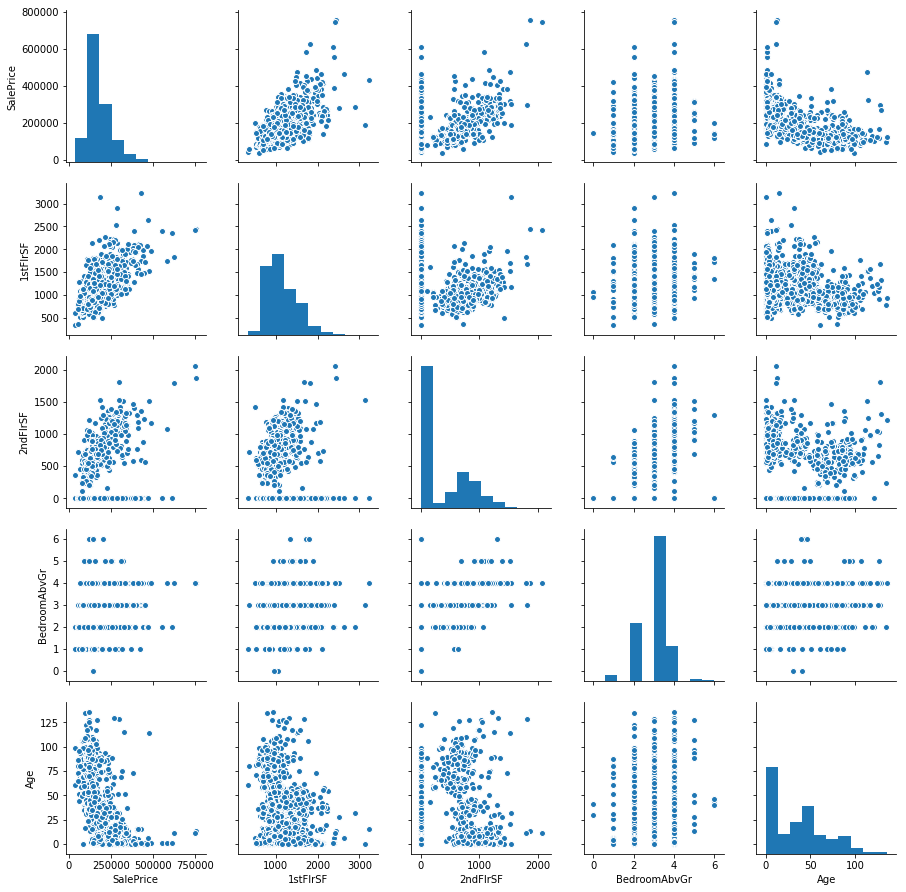

In [37]:
sns.pairplot(housing[["SalePrice"]+num_vars[4:]]);

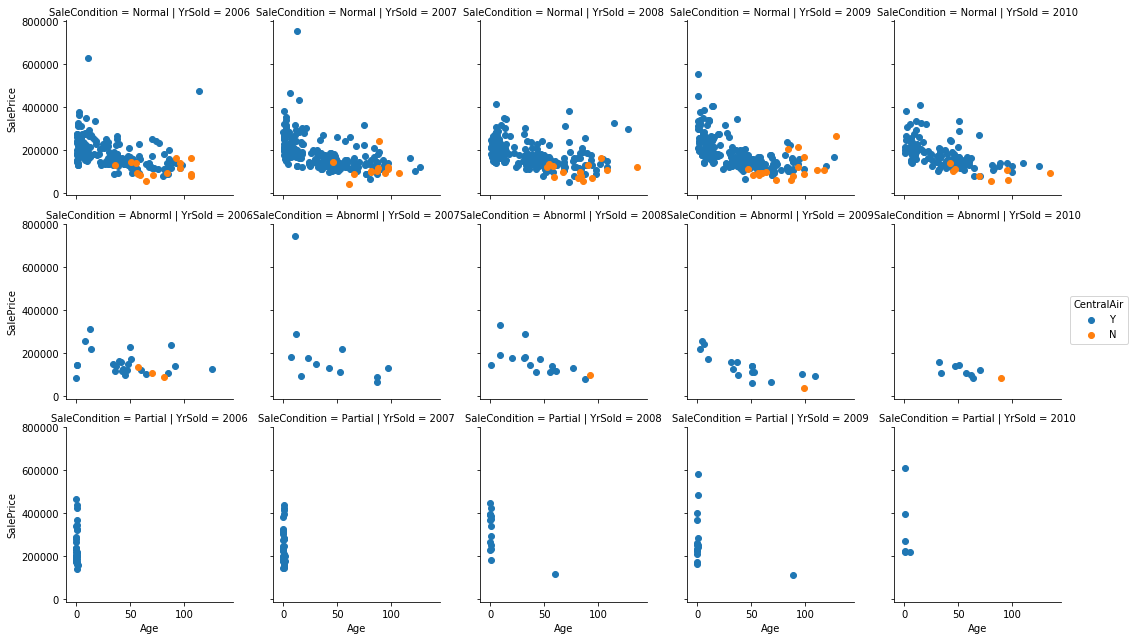

In [39]:
conditional_plot = sns.FacetGrid(housing,col="YrSold",row="SaleCondition",hue="CentralAir")
conditional_plot.map(plt.scatter,"Age","SalePrice").add_legend();

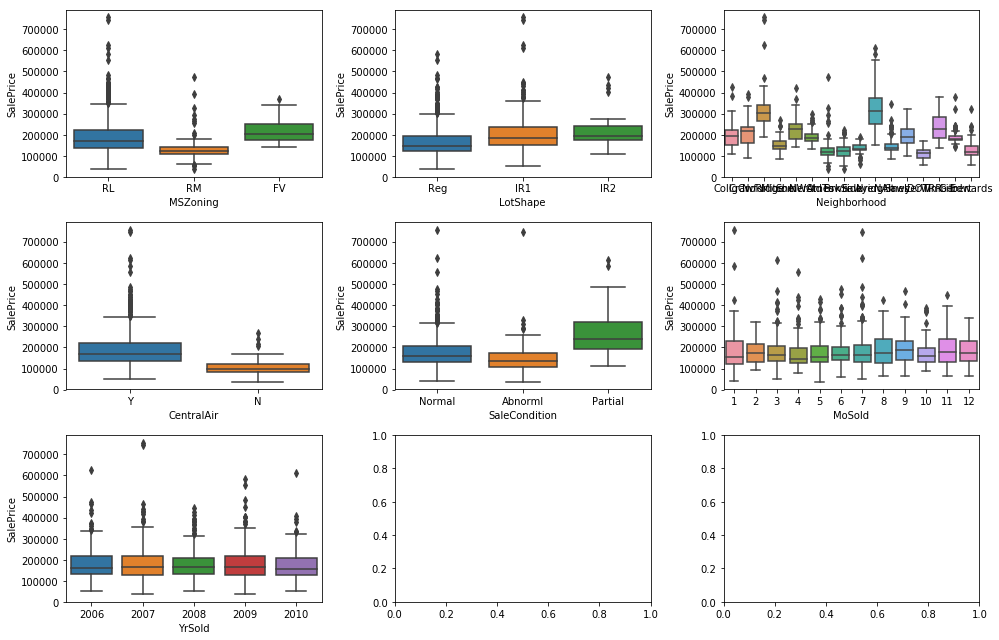

In [41]:
# box plots for cateogorical and numerical variables

fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(cat_vars,ax.flatten()):
    sns.boxplot(x=var, y = "SalePrice",data=housing,ax=subplot)
fig.tight_layout()

In [47]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

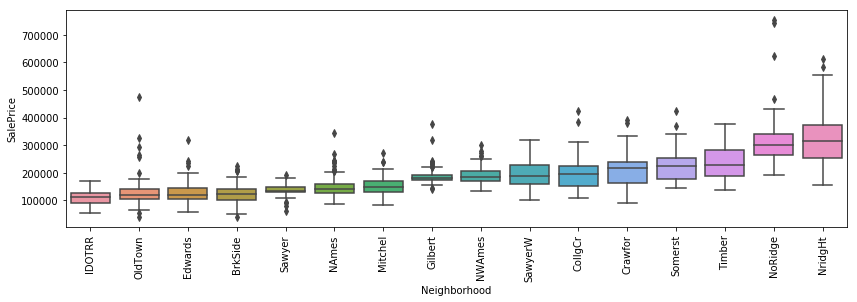

In [48]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x = "Neighborhood", y= "SalePrice",data=housing,order=sorted_nb ,ax=ax)
plt.xticks(rotation= "vertical");